[View in Colaboratory](https://colab.research.google.com/github/sdevika/MLBootCamp/blob/master/lab2_partA.ipynb)

## Lab 2: Part A: Logistic regression
We explore logistic regression in this notebook on two toy data sets.

In [28]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Unregularized logistic regression

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


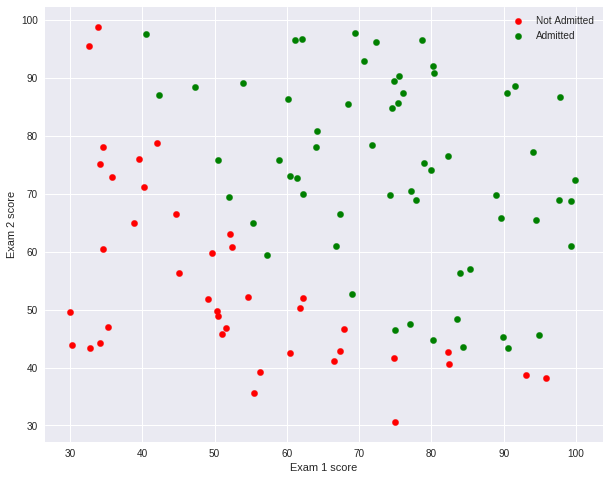

In [13]:
#!git clone https://github.com/sdevika/MLBootCamp/

data = pd.read_csv('MLBootCamp/ex1data1.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

def plot_twoclass_data(X,y,xlabel,ylabel,legend):
    fig = plt.figure()
    X0 = X[np.where(y==0)]
    X1 = X[np.where(y==1)]
    plt.scatter(X0[:,0],X0[:,1],c='red', s=40, label = legend[0])
    plt.scatter(X1[:,0],X1[:,1],c='green', s = 40, label=legend[1])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="upper right")

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_twoclass_data(X,y,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])

### Fit logistic model and visualize decision boundary

Theta found by sklearn:  [[0.20623222 0.2014719 ]] [-25.16138457]


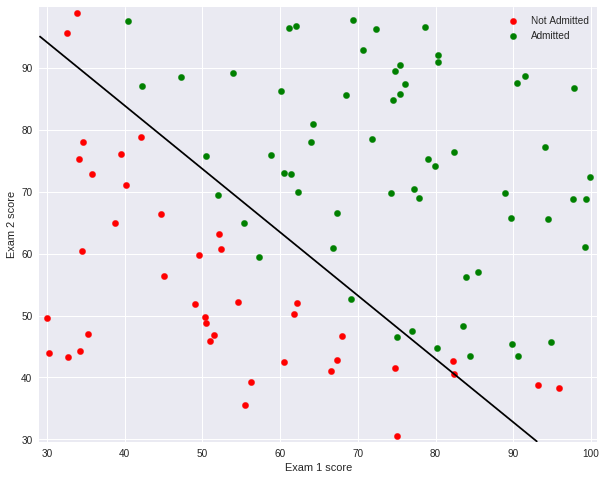

In [14]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5,solver='lbfgs',fit_intercept=True)
logreg.fit(X,y)
print "Theta found by sklearn: ", logreg.coef_, logreg.intercept_

def plot_decision_boundary_sklearn(X,y,sk_logreg,  xlabel, ylabel, legend):
    plot_twoclass_data(X,y,xlabel,ylabel,legend)
    
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # make predictions on this mesh
    Z = np.array(sk_logreg.predict(np.c_[xx1.ravel(), xx2.ravel()]))

    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])

plot_decision_boundary_sklearn(X,y,logreg,'Exam 1 score', 'Exam 2 score',['Not Admitted','Admitted'])


### Predicting with a logistic regression model

In [15]:
#  calculate the probability of a student being admitted with score of 45,85

pred_prob = logreg.predict_proba(np.array([[45,85]]))[0][1]
print "For a student with 45 on exam 1 and 85 on exam 2, the probability of admission = ", pred_prob

# compute accuracy on the training set

predy = logreg.predict(X)

# calculate the accuracy of predictions on training set 

accuracy = np.mean(predy==y)
print "Accuracy on the training set = ", accuracy

For a student with 45 on exam 1 and 85 on exam 2, the probability of admission =  0.7762901213932106
Accuracy on the training set =  0.89


### Regularized logistic regression

Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...


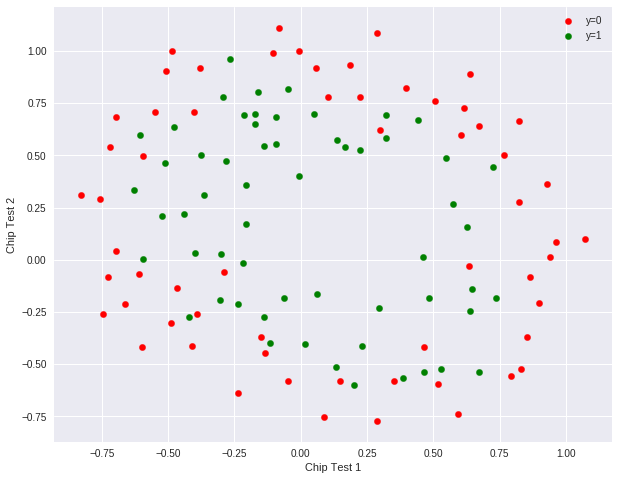

In [16]:
data = pd.read_csv('MLBootCamp/ex2data2.txt')
X = np.vstack([data.x1,data.x2]).T
y = data.y

print 'Plotting data with green circle indicating (y=1) examples and red circle indicating (y=0) examples ...'
plot_twoclass_data(X,y,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

### Expanding basis functions and regularizing logistic regression

Theta found by sklearn with L2 reg:  [ 0.62536719  1.18095854 -2.01961804 -0.91752388 -1.43170395  0.12391867
 -0.36536954 -0.35715555 -0.17501434 -1.45827831 -0.05112356 -0.61575808
 -0.27472128 -1.19276292 -0.24241519 -0.20587922 -0.0448395  -0.27780311
 -0.29535733 -0.45625452 -1.04347339  0.02770608 -0.29252353  0.01550105
 -0.32746466 -0.1439423  -0.92460358] [1.27271075]
Accuracy on training set for sklearn theta =  0.8305084745762712


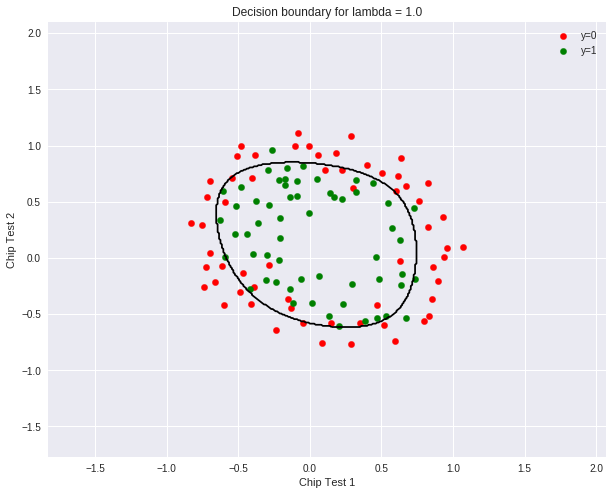

In [25]:
# map the features in ex2data2.txt into a pth order polynomial

import sklearn
from sklearn.preprocessing import PolynomialFeatures

# Map X onto polynomial features and normalize

p = 6
poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
X_poly = poly.fit_transform(X)

alpha = 1.0

sk_logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
sk_logreg.fit(X_poly,y)
print "Theta found by sklearn with L2 reg: ", sk_logreg.coef_[0], sk_logreg.intercept_

# accuracy on training set with sklearn's theta

predy = sk_logreg.predict(X_poly)
print "Accuracy on training set for sklearn theta = ", np.mean(predy==y)

def plot_decision_boundary_sklearn_poly(X,y,sk_logreg,reg,p,  xlabel, ylabel, legend):
    plot_twoclass_data(X,y,xlabel,ylabel,legend)
    
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # make predictions on this mesh
    poly = sklearn.preprocessing.PolynomialFeatures(degree=p,include_bias=False)
    X_poly = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()])
       
    
    Z = np.array(sk_logreg.predict(X_poly))

    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])
    plt.title("Decision boundary for lambda = " + str(reg))

plot_decision_boundary_sklearn_poly(X,y,sk_logreg,reg,p,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

## TODO
Experiment with various values of the regularization parameter in the cell above and comment on accuracies as well 
 as decision boundary shape. Try values of 0.001, 0.01, 0.1, 1.0, 10.0


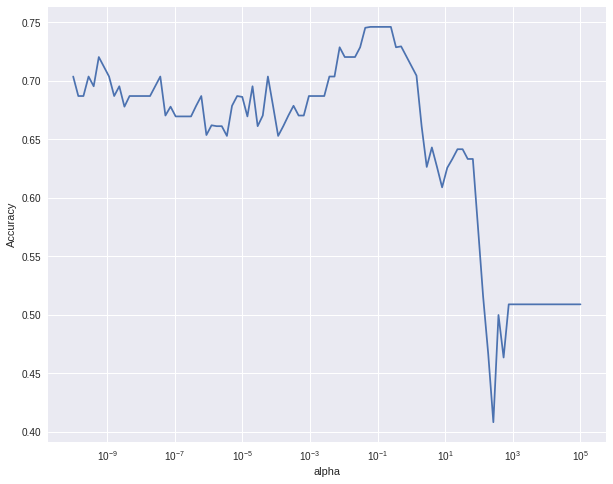

In [30]:
# What is the best value for the regularization term?

# to find the optimal value of alpha, select the highest degree you want to work with
# and then sweep through the alphas on a logarithmic scale

n_alphas = 100
alphas = np.logspace(-10, 5, n_alphas)
scores = []

for alpha in alphas:
  polynomial_features = PolynomialFeatures(degree=15,
                                             include_bias=False)
  logreg = linear_model.LogisticRegression(C=1.0/alpha,solver='lbfgs',fit_intercept=True)
  pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logreg", logreg)])
  pipeline.fit(X, y)
  score = cross_val_score(pipeline, X, y,
                             scoring='accuracy', cv=10)
  scores.append(np.mean(score))
  
plt.semilogx(alphas,scores)
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.show()

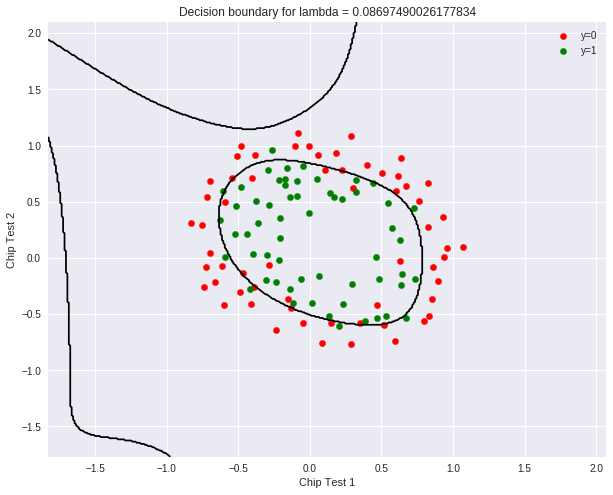

In [32]:
# build the final model with the optimal alpha
best_alpha = alphas[scores.index(max(scores))]


polynomial_features = PolynomialFeatures(degree=15,
                                             include_bias=False)
logreg = linear_model.LogisticRegression(C=1.0/best_alpha,solver='lbfgs',fit_intercept=True)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("logreg", logreg)])
pipeline.fit(X, y)
score = cross_val_score(pipeline, X, y,
                             scoring='accuracy', cv=10)
plot_decision_boundary_sklearn_poly(X,y,logreg,best_alpha,15,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

### Regularizing logistic regression with L1 norm

Theta found by sklearn with L1 reg:  [ 0.68660927  1.28045925 -4.86250571 -1.6217652  -2.34229777  0.
  0.          0.          0.          0.          0.          0.
  0.         -2.36747891  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]
Accuracy on training set for sklearn theta =  0.7966101694915254


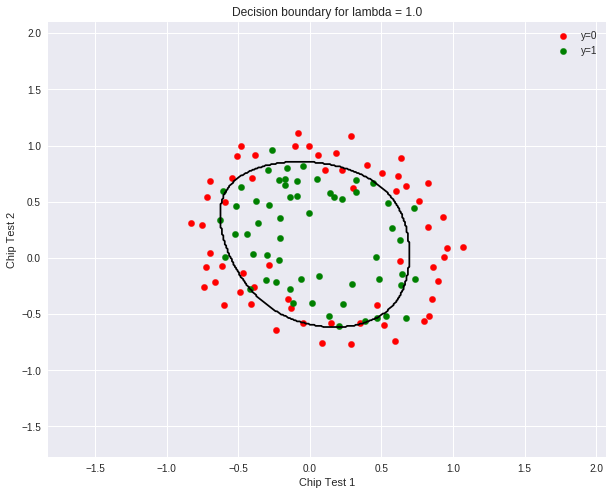

In [26]:
# impose L1 penalty rather than L2; need to use liblinear solver
reg = 1.0
sk_logreg = linear_model.LogisticRegression(C=1.0/reg,solver='liblinear',fit_intercept=True,penalty='l1')
sk_logreg.fit(X_poly,y)
print "Theta found by sklearn with L1 reg: ", sk_logreg.coef_[0]
predy = sk_logreg.predict(X_poly)
print "Accuracy on training set for sklearn theta = ", np.mean(predy==y)
plot_decision_boundary_sklearn_poly(X,y,sk_logreg,reg,p,'Chip Test 1', 'Chip Test 2',['y=0','y=1'])

### Plotting regularization path

Computing regularization path ...


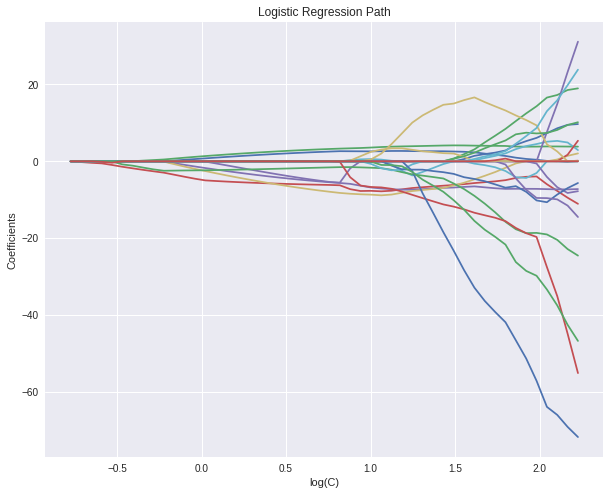

In [0]:
# From
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_path.html#example-linear-model-plot-logistic-path-py

def plot_regularization_path(X,y):
    plt.figure()
    cs = sklearn.svm.l1_min_c(X, y, loss='log') * np.logspace(0, 3)
    print("Computing regularization path ...")
    clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
    coefs_ = []
    for c in cs:
        clf.set_params(C=c)
        clf.fit(X, y)
        coefs_.append(clf.coef_.ravel().copy())

    coefs_ = np.array(coefs_)
    plt.plot(np.log10(cs), coefs_)
    ymin, ymax = plt.ylim()
    plt.xlabel('log(C)')
    plt.ylabel('Coefficients')
    plt.title('Logistic Regression Path')

plot_regularization_path(X_poly,y)

In [0]:
# GDA on synthetic data

from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

X, y = make_blobs(n_samples=n_samples, n_features=2, centers=[(-5,-5), (5,5)])

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X,y)


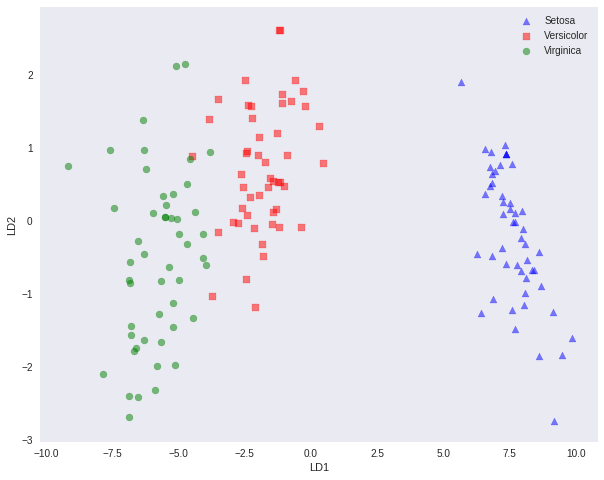

In [37]:
# Gaussian Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn import datasets

iris = sklearn.datasets.load_iris()
label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

X = iris.data
y = iris.target

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)


def plot_iris_lda(X):

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    marker=marker,
                    color=color,
                    alpha=0.5,
                    label=label_dict[label]
                    )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()
    
plot_iris_lda(X_lda_sklearn)

In [35]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])